In [30]:
import numpy as np
import pandas as pd
import os
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz

In [31]:
from dotenv import load_dotenv
load_dotenv()

True

In [32]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [33]:
#2018
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2018-12-31", tz="America/New_York").isoformat()

# Set the ticker information
# UPDATE WITH COMPANY TICKERS
tickers = ["F","TSLA", "GM"]

# Get 3 year's worth of historical price data for Ford, Tesla, GMC
df2018_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df2018_ticker.head()

F                                    GM         \
                            open   high    low  close    volume   open   high   
time                                                                            
2018-01-02 00:00:00-05:00  12.52  12.66  12.50  12.65  16690873  41.24  41.87   
2018-01-03 00:00:00-05:00  12.68  12.80  12.67  12.75  24832828  42.21  42.95   
2018-01-04 00:00:00-05:00  12.78  13.04  12.77  12.98  33286107  43.09  44.25   
2018-01-05 00:00:00-05:00  13.06  13.22  13.04  13.19  37620628  44.50  44.64   
2018-01-08 00:00:00-05:00  13.21  13.22  13.11  13.14  21863372  44.04  44.59   

                                                        TSLA            \
                               low   close    volume    open      high   
time                                                                     
2018-01-02 00:00:00-05:00  41.1500  41.810   5775050  312.18  322.1099   
2018-01-03 00:00:00-05:00  42.2000  42.815  10845178  321.00  325.2500   
2018-01-04 00:00:00-05:00  43.0500  44.140  14952993  312.87  318.5500   
2018-01-05 00:00:00-05:00  43.9600  44.004   8063566  316.62  317.2400   
2018-01-08 00:00:00-05:00  43.5201  44.220   9808090  316.00  337.0199   

                                                    
                              low   close   volume  
time                                                
2018-01-02 00:00:00-05:00  311.00  320.29  3322648  
2018-01-03 00:00:00-05:00  315.55  317.01  3232166  
2018-01-04 00:00:00-05:00  305.68  314.62  7428996  
2018-01-05 00:00:00-05:00  312.00  316.55  3563882  
2018-01-08 00:00:00-05:00  315.50  336.41  7721537

In [34]:
# Create and empty DataFrame for closing prices
df2018_closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df2018_closing_prices["F"] = df2018_ticker["F"]["close"]
df2018_closing_prices["TSLA"] = df2018_ticker["TSLA"]["close"]
df2018_closing_prices["GM"] = df2018_ticker["GM"]["close"]

# Drop the time component of the date
df2018_closing_prices.index = df2018_closing_prices.index.date

# Compute daily returns
df2018_daily_returns = df2018_closing_prices.pct_change().dropna()

# Display sample data
df2018_daily_returns.head()

,F,TSLA,GM
2018-01-03,0.007905,-0.010241,0.024037
2018-01-04,0.018039,-0.007539,0.030947
2018-01-05,0.016179,0.006134,-0.003081
2018-01-08,-0.003791,0.062739,0.004909
2018-01-09,-0.003805,-0.008085,-0.003618


In [35]:
df2018_daily_returns.describe()

,F,TSLA,GM
count,250.000000,250.000000,250.000000
mean,-0.001882,0.000801,-0.000710
std,0.017421,0.036817,0.020181
min,-0.070229,-0.139010,-0.050449
25%,-0.010255,-0.020207,-0.012259
50%,-0.000853,-0.002170,0.000000
75%,0.007433,0.018143,0.008548
max,0.097680,0.172350,0.128585


<AxesSubplot:ylabel='Frequency'>

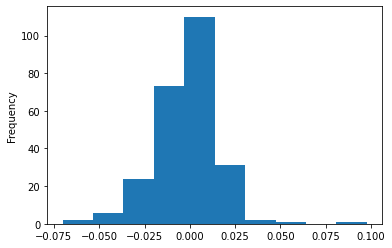

In [36]:
df2018_daily_returns["F"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

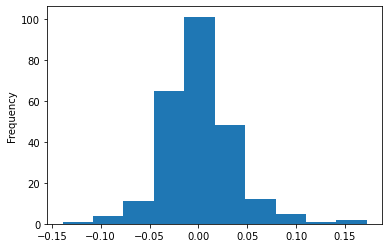

In [37]:
df2018_daily_returns["TSLA"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

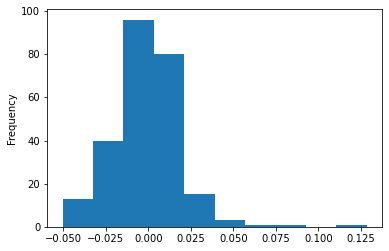

In [38]:
df2018_daily_returns["GM"].plot.hist()

In [39]:
df2018_daily_returns.head()

,F,TSLA,GM
2018-01-03,0.007905,-0.010241,0.024037
2018-01-04,0.018039,-0.007539,0.030947
2018-01-05,0.016179,0.006134,-0.003081
2018-01-08,-0.003791,0.062739,0.004909
2018-01-09,-0.003805,-0.008085,-0.003618


In [40]:
# Annual return
df2018_annual_returns = df2018_closing_prices.pct_change(250).dropna()
df2018_annual_returns.head()

,F,TSLA,GM
2018-12-31,-0.398814,0.034853,-0.20354


In [41]:
# Incorporate revenue data from excel file
from datetime import datetime,date
os.chdir(r"C:\Users\dmwal\Documents\FinTech2021\Project_1\Newly_Minted")
revenue_data = pd.read_excel("draft.xlsx")
#revenue_data.set_index("Date", inplace= True)
#revenue_data.index = pd.to_datetime(revenue_data.index)
revenue_data.head()
#revenue_data[‘revenue_data_pct_change’] = vix.sort_index(ascending=True).pct_change()
#total_returns = pd.merge(total_returns, vix.reset_index(), how=‘inner’, left_on= pd.to_datetime(total_returns[‘time’], utc=True).dt.date,right_on=pd.to_datetime(vix.reset_index()[‘Date’], utc=True).dt.date)
#total_returns.head()

,Ticker,Date,Revenue
0,TSLA,2018-01-01,21461268
1,TSLA,2019-01-01,24578000
2,TSLA,2020-01-01,31536000
3,F,2018-01-01,160338000
4,F,2019-01-01,155900000


In [42]:
df2018_annual_returns = pd.DataFrame(df2018_annual_returns.unstack())
df2018_annual_returns.reset_index(inplace = True)
df2018_annual_returns.head()

,level_0,level_1,0
0,F,2018-12-31,-0.398814
1,TSLA,2018-12-31,0.034853
2,GM,2018-12-31,-0.203540


In [43]:
df2018_annual_returns["level_1"] = pd.to_datetime(df2018_annual_returns["level_1"]).dt.year
revenue_data["Date"] = pd.to_datetime(revenue_data["Date"]).dt.year
revenue_data

,Ticker,Date,Revenue
0,TSLA,2018,21461268
1,TSLA,2019,24578000
2,TSLA,2020,31536000
3,F,2018,160338000
4,F,2019,155900000
5,F,2020,127144000
6,GM,2018,147049000
7,GM,2019,137237000
8,GM,2020,122485000


In [59]:
df2018_annual_returns= df2018_annual_returns.rename(columns={"level_0":"ticker","level_1":"year", 0:"Annual Closing Price"})
df2018_annual_returns

,ticker,year,Annual Closing Price
0,F,2018,-0.398814
1,TSLA,2018,0.034853
2,GM,2018,-0.203540


In [64]:
# Merge the two dataframes on the ticker and date
total_df = pd.merge(df2018_annual_returns, revenue_data, how="outer", left_on= ["ticker", "year"],right_on=["Ticker", "Date"]).dropna()
total_df

,ticker,year,Annual Closing Price,Ticker,Date,Revenue
0,F,2018.0,-0.398814,F,2018,160338000
1,TSLA,2018.0,0.034853,TSLA,2018,21461268
2,GM,2018.0,-0.203540,GM,2018,147049000
